# TEXT BASED ANALYSIS


**AUTHENTICATION:**

In [7]:
# Install the PRAW library
!pip install praw
# Upgrade pip to the latest version
!pip install --upgrade pip
# Import the PRAW library
import praw
# Define a user agent for Reddit API access
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
# Initialize a Reddit instance with your client ID, client secret, and user agent
reddit = praw.Reddit(
    client_id="1570Wyx2TI9-s-Vszy-Uzg",
    client_secret="pZA51fDeCSXhNRFmE929_27PZRrrtQ",
    user_agent=user_agent
)

**GET TRENDING TOPIC FROM REDDIT:**

The "ACCIDENTS" subreddit channel will be use for this project

In [9]:
!pip install pandas
!pip install numpy
!pip install pyarrow

import pandas as pd
import numpy as np
import re #RegEx : Regular expression# Hot new rising topics

# Retrieving data from the "Valentine" subreddit
headlines = set()
for submission in reddit.subreddit("Accidents").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
    
# Print the number of unique headlines retrieved    
print(len(headlines))

Tw: gore. Door handle in arm
1cckr08
Snoo41337
1714025521.0
720
0.95
https://www.reddit.com/gallery/1cckr08
0


**GET TOTAL COMMENT IN SUBREDDIT:**

In [10]:
# Initialize an empty set to store unique submission titles
headlines = set()
# Iterate over each submission in the "bitcoin" subreddit that is currently hot
for submission in reddit.subreddit("Accidents").hot(limit=None):
    # Add the title of each submission to the set of headlines
    headlines.add(submission.title)
# Print the total number of unique titles collected
print(len(headlines))

961


**CREATING A DATAFRAME:**

In [11]:
#Create a dataframe from the scrapped data 
Accidents_df = pd.DataFrame(headlines)
Accidents_df.head()

,0
0,Baltimore Bridge collapses after ship crashes ...
1,Bad luck on snow
2,Run for your life!!
3,Truck fell off lifted highway due to a heavy s...
4,Russia


**DISPLAYING ROWS OF A DATAFRAME:**

In [12]:
#df = df.iloc[:, 1:]
# Display the first few rows of the Accidents DataFrame
Accidents_df.head()

,0
0,Baltimore Bridge collapses after ship crashes ...
1,Bad luck on snow
2,Run for your life!!
3,Truck fell off lifted highway due to a heavy s...
4,Russia


**DISPLAYING COLUMNS OF A DATAFRAME:**

In [13]:
# Display the column names of the Accidents DataFrame
Accidents_df.columns

RangeIndex(start=0, stop=1, step=1)

**RENAMING COLUMN OF A DATAFRAME:**

In [14]:
# Renaming the column of the Bitcoin DataFrame to 'Titles' and displaying the first few rows
Accidents_df.columns = ['Titles']
Accidents_df.head()

,Titles
0,Baltimore Bridge collapses after ship crashes ...
1,Bad luck on snow
2,Run for your life!!
3,Truck fell off lifted highway due to a heavy s...
4,Russia


**PRINTING DATA TYPES OF COLUMNS:**

In [15]:
# df.dtypes returns data types of the data frame
Accidents_df.dtypes

Titles    object
dtype: object

**PRINTING INFORMATION OF DATA:**

In [16]:
#df.info returns concise summary of a DataFrame
Accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Titles  961 non-null    object
dtypes: object(1)
memory usage: 7.6+ KB


**PRINTING STATISTICAL INFORMATION OF DATA:**

In [17]:
#The df.describe() method in pandas is used to generate descriptive statistics of the central tendency, dispersion, and shape of a DataFrame's distribution, excluding NaN values
Accidents_df.describe()

,Titles
count,961
unique,961
top,Baltimore Bridge collapses after ship crashes ...
freq,1


**ADDING A NEW COLUMN TO THE DATAFRAME:**

In [18]:
#Let’s add a new column with the length of the “text” column
#df['text']: Selects the 'text' column from the DataFrame.
#.str.len(): Applies the len() function to each element in the 'text' column, returning the length of each string.
#df['length'] = ...: Creates a new column named 'length' in the DataFrame and assigns the calculated lengths to this column

Accidents_df['length'] = Accidents_df['Titles'].str.len()
Accidents_df.describe()

,length
count,961.000000
mean,37.508845
std,26.395789
min,1.000000
25%,20.000000
50%,31.000000
75%,48.000000
max,229.000000


**PRINTING INFORMATION OF DATAFRAME:**

In [19]:
#The df.describe(include='O') output will show statistics for each object (string) column in your DataFrame.
Accidents_df.describe(include='O')

,Titles
count,961
unique,961
top,Baltimore Bridge collapses after ship crashes ...
freq,1


**CHECKING DUPLICATE TITLES OF A DATAFRAME:**

In [20]:
# Checking for duplicate titles in the Accidents DataFrame and counting the occurrences
Accidents_df.Titles.duplicated().sum() 

0

**FINDING A MISSING VALUES OF DATAFRAME:**

In [21]:
#df.isna().sum() output will show the count of missing values for each column in your DataFrame.
Accidents_df.isna().sum()

Titles    0
length    0
dtype: int64

**CONVERTING UPPERCASE AND LOWERCASE:**

In [23]:
#df['Titles'] = df['Titles'].str.upper(): Converts the values in the 'speaker' column to uppercase.


Accidents_df['Titles'] = Accidents_df['Titles'].str.upper()
print (Accidents_df)

                                                Titles  length
0    BALTIMORE BRIDGE COLLAPSES AFTER SHIP CRASHES ...      54
1                                     BAD LUCK ON SNOW      16
2                                  RUN FOR YOUR LIFE!!      19
3    TRUCK FELL OFF LIFTED HIGHWAY DUE TO A HEAVY S...     187
4                                               RUSSIA       6
..                                                 ...     ...
956    TRAIN HITS A COW AND THE COW INSTANTLY EXPLODES      47
957                              INSANE TRUCK ACCIDENT      21
958  WOMEN CLAIMING TO BE A WITCH TRIES TO STOP A L...      54
959  MOTORCYCLE HITS CAR DOING 100MPH (KIDS INSIDE ...      50
960           DUDE WANTED TO PRACTICE FOR A NEW RECORD      40

[961 rows x 2 columns]


**CLEANING THE TEXT:**

In [24]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
Accidents_df["Titles"]= Accidents_df["Titles"].apply(cleanTxt)

#Show the clean text
Accidents_df.head()

,Titles,length
0,BALTIMORE BRIDGE COLLAPSES AFTER SHIP CRASHES ...,54
1,BAD LUCK ON SNOW,16
2,RUN FOR YOUR LIFE!!,19
3,TRUCK FELL OFF LIFTED HIGHWAY DUE TO A HEAVY S...,187
4,RUSSIA,6


**REMOVING EMOJI AND UNICODE:**

In [25]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Accidents_df["Titles"]= Accidents_df["Titles"].apply(remove_emoji)

#Show the clean text
Accidents_df.head()

,Titles,length
0,BALTIMORE BRIDGE COLLAPSES AFTER SHIP CRASHES ...,54
1,BAD LUCK ON SNOW,16
2,RUN FOR YOUR LIFE!!,19
3,TRUCK FELL OFF LIFTED HIGHWAY DUE TO A HEAVY S...,187
4,RUSSIA,6


**PLOTTING CHARTS:**

Text(0.5, 1.0, 'Line Plot of Length Column')

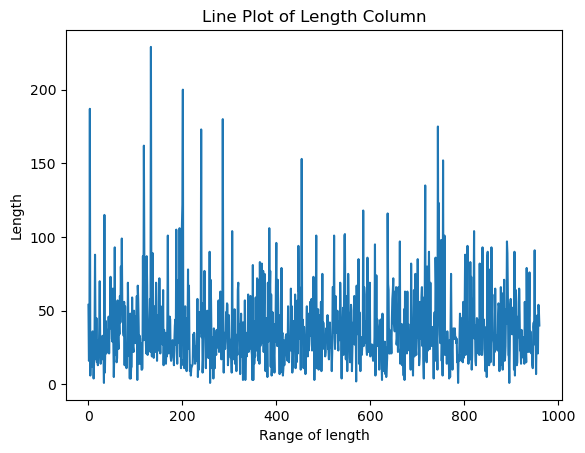

In [27]:
#df['length'].plot(): This creates a line plot for the 'length' column. The x-axis will likely represent the index of the DataFrame, and the y-axis will represent the values in the 'length' column.
#df['length'].plot(kind='box', vert=False): This creates a horizontal box plot for the 'length' column. Box plots provide a visual summary of the distribution of data, including the median, quartiles, and potential outliers.

!pip install matplotlib

import matplotlib.pyplot as plt
Accidents_df['length'].plot()
plt.xlabel('Range of length') 
plt.ylabel('Length')
plt.title('Line Plot of Length Column') 

**BOX PLOT:**

Text(0.5, 1.0, 'Box Plot of Length Column')

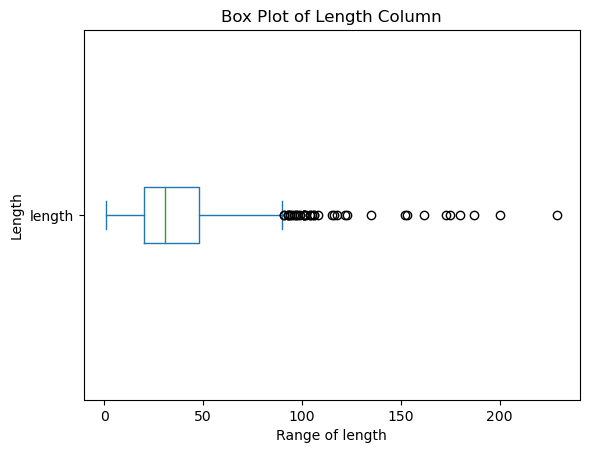

In [28]:
Accidents_df['length'].plot(kind='box', vert=False)
plt.xlabel('Range of length')
plt.ylabel('Length') 
plt.title('Box Plot of Length Column') 

**HISTOGRAM:**

Text(0.5, 1.0, 'Histogram of Length Column')

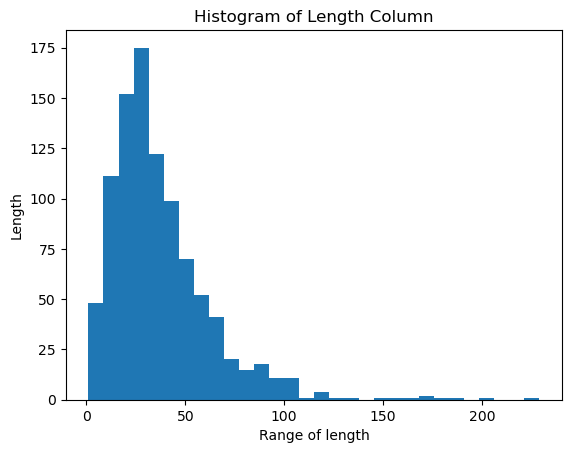

In [29]:
#df['length'].plot(kind='hist', bins=30): This creates a histogram for the 'length' column with 30 bins. The x-axis represents the range of 'length' values, and the y-axis represents the frequency or count of values within each bin.

Accidents_df['length'].plot(kind='hist', bins=30)
plt.xlabel('Range of length')  
plt.ylabel('Length')  
plt.title('Histogram of Length Column') 

**REGEX TO PULL OUT WORDS:**

In [30]:
!pip install regex
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-zA-Z][\w-]*', Titles)


Accidents_df['tokenized_Titles'] = Accidents_df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(Accidents_df[['Titles', 'tokenized_Titles']].head())


                                              Titles  \
0  BALTIMORE BRIDGE COLLAPSES AFTER SHIP CRASHES ...   
1                                   BAD LUCK ON SNOW   
2                                RUN FOR YOUR LIFE!!   
3  TRUCK FELL OFF LIFTED HIGHWAY DUE TO A HEAVY S...   
4                                             RUSSIA   

                                    tokenized_Titles  
0  [BALTIMORE, BRIDGE, COLLAPSES, AFTER, SHIP, CR...  
1                              [BAD, LUCK, ON, SNOW]  
2                             [RUN, FOR, YOUR, LIFE]  
3  [TRUCK, FELL, OFF, LIFTED, HIGHWAY, DUE, TO, A...  
4                                           [RUSSIA]  


**FUNCTION TO TOKENIZE:**

In [31]:
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)
    
Accidents_df['tokenized_Titles'] = Accidents_df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(Accidents_df[['Titles', 'tokenized_Titles']].head())

                                              Titles  \
0  BALTIMORE BRIDGE COLLAPSES AFTER SHIP CRASHES ...   
1                                   BAD LUCK ON SNOW   
2                                RUN FOR YOUR LIFE!!   
3  TRUCK FELL OFF LIFTED HIGHWAY DUE TO A HEAVY S...   
4                                             RUSSIA   

                                    tokenized_Titles  
0  [BALTIMORE, BRIDGE, COLLAPSES, AFTER, SHIP, CR...  
1                              [BAD, LUCK, ON, SNOW]  
2                             [RUN, FOR, YOUR, LIFE]  
3  [TRUCK, FELL, OFF, LIFTED, HIGHWAY, DUE, TO, A...  
4                                           [RUSSIA]  


**STOPWORDS FROM DATASET:**

In [32]:
!pip install nltk

import nltk
import pandas as pd

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

# Display the DataFrame
print(Accidents_df.head())  

{'did', 'isn', 'it', 'will', "shouldn't", 'needn', "wasn't", 'all', 'll', 'myself', 'weren', 'that', 'own', 'y', 'why', 'a', "aren't", 'how', 'yourselves', 'who', 'but', 'below', "you'll", 'ours', "you're", 'them', "you'd", 'she', 'above', 'down', 'd', 'these', 'too', 'hadn', 'if', 'itself', 'then', 'mustn', 'ma', 'doing', 'doesn', 'from', 'each', 'again', 'here', 'out', "wouldn't", 'with', 'o', 'than', 'am', 'didn', 'through', "weren't", 'him', 'not', 'm', 'other', "needn't", 'himself', 'been', "she's", 'until', "shan't", 'do', 'does', 'further', "hadn't", "mightn't", "isn't", 'to', 'because', 'an', 'are', 'very', 'having', 'for', 'being', 'your', 'have', "it's", 'has', 'where', 'his', 'more', 'don', 'such', 'ourselves', 'when', 'most', 'before', 'the', 'be', 'ain', "haven't", 'while', "didn't", 'were', 'as', 'my', 'yours', 'should', 'themselves', "couldn't", 'some', 'is', 'nor', "don't", 'shan', 'between', 'at', 'shouldn', 'hers', 'they', 'won', "won't", 's', 'wasn', 'those', 'now', 

**REMOVING STOPWORDS:**

In [33]:
#function to remove stop words
import pandas as pd
import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Read the CSV file into a DataFrame
Accidents_df['cleantokens'] = Accidents_df['Titles'].apply(lambda x: remove_stop(str(x).split()))

# Display the DataFrame with the cleaned tokens
print(Accidents_df[['Titles', 'cleantokens']].tail())

                                                Titles  \
956    TRAIN HITS A COW AND THE COW INSTANTLY EXPLODES   
957                              INSANE TRUCK ACCIDENT   
958  WOMEN CLAIMING TO BE A WITCH TRIES TO STOP A L...   
959  MOTORCYCLE HITS CAR DOING 100MPH (KIDS INSIDE ...   
960           DUDE WANTED TO PRACTICE FOR A NEW RECORD   

                                           cleantokens  
956       [TRAIN, HITS, COW, COW, INSTANTLY, EXPLODES]  
957                          [INSANE, TRUCK, ACCIDENT]  
958   [WOMEN, CLAIMING, WITCH, TRIES, STOP, LANDSLIDE]  
959  [MOTORCYCLE, HITS, CAR, 100MPH, (KIDS, INSIDE,...  
960              [DUDE, WANTED, PRACTICE, NEW, RECORD]  


**CREATING THE PIPELINE:**

In [34]:
import pandas as pd
import nltk


stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the tokenize function (replace with your actual tokenize implementation)
def tokenize(Titles):
    return re.findall(r'\b\w+\b', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


Accidents_df['processed_Titles'] = Accidents_df['Titles'].apply(lambda x: prepare(str(x), pipeline))

# Display the DataFrame with the processed text
print(Accidents_df[['Titles', 'processed_Titles']].tail())


                                                Titles  \
956    TRAIN HITS A COW AND THE COW INSTANTLY EXPLODES   
957                              INSANE TRUCK ACCIDENT   
958  WOMEN CLAIMING TO BE A WITCH TRIES TO STOP A L...   
959  MOTORCYCLE HITS CAR DOING 100MPH (KIDS INSIDE ...   
960           DUDE WANTED TO PRACTICE FOR A NEW RECORD   

                                      processed_Titles  
956       [train, hits, cow, cow, instantly, explodes]  
957                          [insane, truck, accident]  
958   [women, claiming, witch, tries, stop, landslide]  
959  [motorcycle, hits, car, 100mph, kids, inside, ...  
960              [dude, wanted, practice, new, record]  


**RUN THE PIPELINE:**

In [35]:
import pandas as pd
import regex as re

# Define the pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the tokenize function
def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


Accidents_df['tokens'] = Accidents_df['Titles'].apply(lambda x: prepare(str(x), pipeline=pipeline))

# Display the DataFrame with the processed tokens
print(Accidents_df[['Titles', 'tokens']].head())


                                              Titles  \
0  BALTIMORE BRIDGE COLLAPSES AFTER SHIP CRASHES ...   
1                                   BAD LUCK ON SNOW   
2                                RUN FOR YOUR LIFE!!   
3  TRUCK FELL OFF LIFTED HIGHWAY DUE TO A HEAVY S...   
4                                             RUSSIA   

                                              tokens  
0      [baltimore, bridge, collapses, ship, crashes]  
1                                  [bad, luck, snow]  
2                                        [run, life]  
3  [truck, fell, lifted, highway, due, heavy, sto...  
4                                           [russia]  


**COUNTING THE TOKENS:**

In [36]:
#count the tokens
Accidents_df['num_tokens'] = Accidents_df['tokens'].map(len)
Accidents_df.tail()

,Titles,length,tokenized_Titles,cleantokens,processed_Titles,tokens,num_tokens
956,TRAIN HITS A COW AND THE COW INSTANTLY EXPLODES,47,"[TRAIN, HITS, A, COW, AND, THE, COW, INSTANTLY...","[TRAIN, HITS, COW, COW, INSTANTLY, EXPLODES]","[train, hits, cow, cow, instantly, explodes]","[train, hits, cow, cow, instantly, explodes]",6
957,INSANE TRUCK ACCIDENT,21,"[INSANE, TRUCK, ACCIDENT]","[INSANE, TRUCK, ACCIDENT]","[insane, truck, accident]","[insane, truck, accident]",3
958,WOMEN CLAIMING TO BE A WITCH TRIES TO STOP A L...,54,"[WOMEN, CLAIMING, TO, BE, A, WITCH, TRIES, TO,...","[WOMEN, CLAIMING, WITCH, TRIES, STOP, LANDSLIDE]","[women, claiming, witch, tries, stop, landslide]","[women, claiming, witch, tries, stop, landslide]",6
959,MOTORCYCLE HITS CAR DOING 100MPH (KIDS INSIDE ...,50,"[MOTORCYCLE, HITS, CAR, DOING, 100MPH, KIDS, I...","[MOTORCYCLE, HITS, CAR, 100MPH, (KIDS, INSIDE,...","[motorcycle, hits, car, 100mph, kids, inside, ...","[motorcycle, hits, car, 100mph, kids, inside, ...",7
960,DUDE WANTED TO PRACTICE FOR A NEW RECORD,40,"[DUDE, WANTED, TO, PRACTICE, FOR, A, NEW, RECORD]","[DUDE, WANTED, PRACTICE, NEW, RECORD]","[dude, wanted, practice, new, record]","[dude, wanted, practice, new, record]",5


**WORD FREQUENCY ANALYSIS:**

In [37]:
#Word frequency Analysis

from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

testcount= Counter(tokens)
print(testcount)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


**ADDING DATA TO COUNT:**

In [38]:
#Adding new data to the current count

more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens)
print(testcount)


Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


**LETS COUNT:**

In [39]:
#Let’s count

counter = Counter()
Accidents_df['tokens'].map(counter.update)
print(counter.most_common(5))

[('car', 77), ('accident', 74), ('man', 74), ('crash', 52), ('truck', 43)]


**FREQUENCY OF DATAFRAME:**

In [40]:
#Now, we put the word frequency in it’s own dataframe for analysis

freq_Accidents_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_Accidents_df = freq_Accidents_df.query('freq >= 1')
freq_Accidents_df.index.name = 'token'
print(freq_Accidents_df)

           freq
token          
baltimore     4
bridge        9
collapses     9
ship          6
crashes      23
...         ...
witch         1
100mph        1
inside        1
practice      1
record        1

[1875 rows x 1 columns]


**SORT AND DISPLAY:**

In [41]:
#Lets sort and display

freq_Accidents_df = freq_Accidents_df.sort_values('freq', ascending=False)
freq_Accidents_df.head(10)

,freq
token,
car,77
accident,74
man,74
crash,52
truck,43
driver,40
hit,38
gets,37
train,33


**FINDING INFORMATION OF FREQUENCY:**

In [42]:
freq_Accidents_df.describe()

,freq
count,1875.000000
mean,2.319467
std,4.609144
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,77.000000


**BAR CHART:**

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

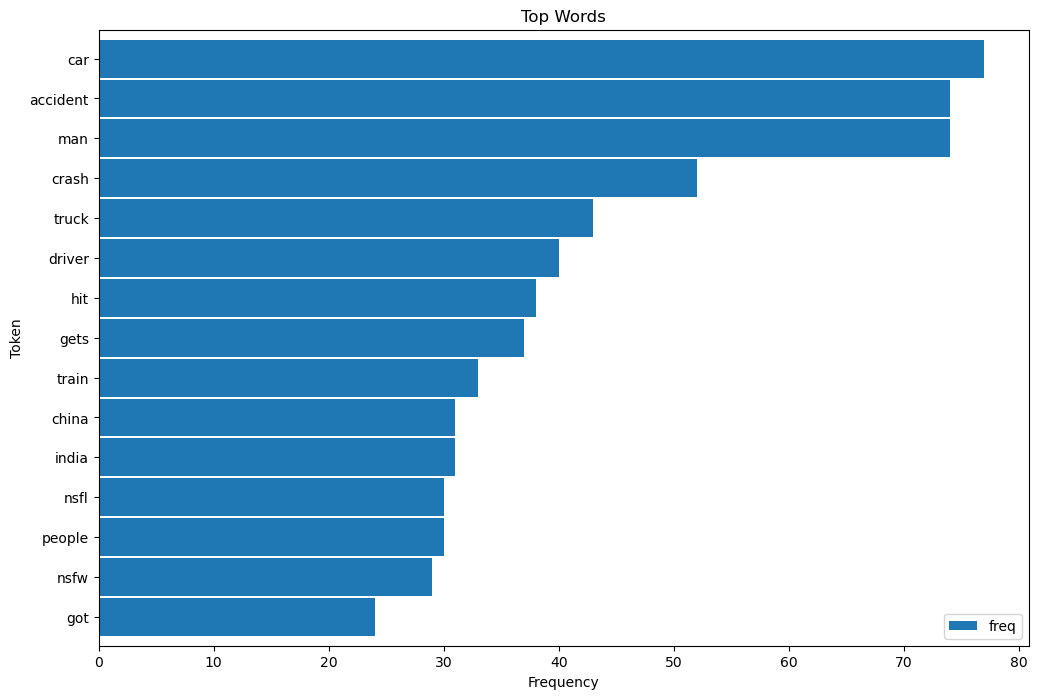

In [43]:
#Bar chart 

ax = freq_Accidents_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8),)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

**SENTIMENT ANALYSIS OF ACCIDENTS:**

In [44]:
!pip install textblob

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
Accidents_df['Subjectivity'] = Accidents_df['Titles'].apply(getSubjectivity)
Accidents_df['Polarity'] = Accidents_df['Titles'].apply(getPolarity)

#Now display data
Accidents_df.head()

,Titles,length,tokenized_Titles,cleantokens,processed_Titles,tokens,num_tokens,Subjectivity,Polarity
0,BALTIMORE BRIDGE COLLAPSES AFTER SHIP CRASHES ...,54,"[BALTIMORE, BRIDGE, COLLAPSES, AFTER, SHIP, CR...","[BALTIMORE, BRIDGE, COLLAPSES, SHIP, CRASHES, ...","[baltimore, bridge, collapses, ship, crashes]","[baltimore, bridge, collapses, ship, crashes]",5,0.000000,0.000
1,BAD LUCK ON SNOW,16,"[BAD, LUCK, ON, SNOW]","[BAD, LUCK, SNOW]","[bad, luck, snow]","[bad, luck, snow]",3,0.666667,-0.700
2,RUN FOR YOUR LIFE!!,19,"[RUN, FOR, YOUR, LIFE]","[RUN, LIFE!!]","[run, life]","[run, life]",2,0.000000,0.000
3,TRUCK FELL OFF LIFTED HIGHWAY DUE TO A HEAVY S...,187,"[TRUCK, FELL, OFF, LIFTED, HIGHWAY, DUE, TO, A...","[TRUCK, FELL, LIFTED, HIGHWAY, DUE, HEAVY, STO...","[truck, fell, lifted, highway, due, heavy, sto...","[truck, fell, lifted, highway, due, heavy, sto...",19,0.572778,0.125
4,RUSSIA,6,[RUSSIA],[RUSSIA],[russia],[russia],1,0.000000,0.000


**CATEGORIZING ACCIDENTS REDDIT POSTS:**

In [45]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Apply the getInsight function to the "Polarity" column of the DataFrame
# and store the resulting sentiment insights in a new column named "Insight"   
Accidents_df["Insight"] = Accidents_df["Polarity"].apply(getInsight)

# Display the first 50 rows of the DataFrame with the newly added "Insight" column
Accidents_df.head(50)

,Titles,length,tokenized_Titles,cleantokens,processed_Titles,tokens,num_tokens,Subjectivity,Polarity,Insight
0,BALTIMORE BRIDGE COLLAPSES AFTER SHIP CRASHES ...,54,"[BALTIMORE, BRIDGE, COLLAPSES, AFTER, SHIP, CR...","[BALTIMORE, BRIDGE, COLLAPSES, SHIP, CRASHES, ...","[baltimore, bridge, collapses, ship, crashes]","[baltimore, bridge, collapses, ship, crashes]",5,0.000000,0.000000,Neutral
1,BAD LUCK ON SNOW,16,"[BAD, LUCK, ON, SNOW]","[BAD, LUCK, SNOW]","[bad, luck, snow]","[bad, luck, snow]",3,0.666667,-0.700000,Negative
2,RUN FOR YOUR LIFE!!,19,"[RUN, FOR, YOUR, LIFE]","[RUN, LIFE!!]","[run, life]","[run, life]",2,0.000000,0.000000,Neutral
3,TRUCK FELL OFF LIFTED HIGHWAY DUE TO A HEAVY S...,187,"[TRUCK, FELL, OFF, LIFTED, HIGHWAY, DUE, TO, A...","[TRUCK, FELL, LIFTED, HIGHWAY, DUE, HEAVY, STO...","[truck, fell, lifted, highway, due, heavy, sto...","[truck, fell, lifted, highway, due, heavy, sto...",19,0.572778,0.125000,Positive
4,RUSSIA,6,[RUSSIA],[RUSSIA],[russia],[russia],1,0.000000,0.000000,Neutral
5,WOMAN SUCKED BY MACHINE,23,"[WOMAN, SUCKED, BY, MACHINE]","[WOMAN, SUCKED, MACHINE]","[woman, sucked, machine]","[woman, sucked, machine]",3,0.000000,0.000000,Neutral
6,UMBRELLAS ARE SFL. NSFW NSFL,29,"[UMBRELLAS, ARE, SFL, NSFW, NSFL]","[UMBRELLAS, SFL., NSFW, NSFL]","[umbrellas, sfl, nsfw, nsfl]","[umbrellas, sfl, nsfw, nsfl]",4,0.000000,0.000000,Neutral
7,FREAKISH MOTORCYCLE ACCIDENT NSFW,33,"[FREAKISH, MOTORCYCLE, ACCIDENT, NSFW]","[FREAKISH, MOTORCYCLE, ACCIDENT, NSFW]","[freakish, motorcycle, accident, nsfw]","[freakish, motorcycle, accident, nsfw]",4,0.000000,0.000000,Neutral
8,FLIGHT CRASH,12,"[FLIGHT, CRASH]","[FLIGHT, CRASH]","[flight, crash]","[flight, crash]",2,0.000000,0.000000,Neutral
9,CYCLIST CRASH. (RUNS INTO 3 PEOPLE),36,"[CYCLIST, CRASH, RUNS, INTO, PEOPLE]","[CYCLIST, CRASH., (RUNS, 3, PEOPLE)]","[cyclist, crash, runs, 3, people]","[cyclist, crash, runs, 3, people]",5,0.000000,0.000000,Neutral


**DATA VISUALIZATION:**

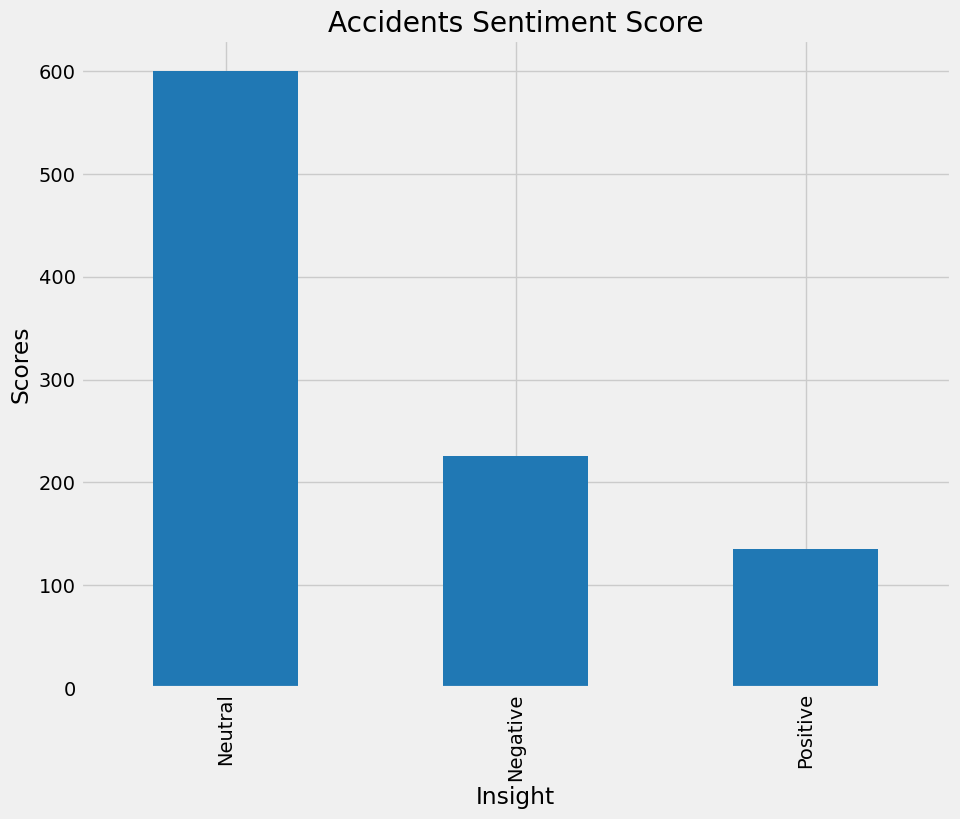

In [47]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Set the plotting style
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Accidents Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
Accidents_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

**EXPLORING SENTIMENT LEXICON AND TOKENIZING OF DATASET:**

In [50]:
import nltk
nltk.download('opinion_lexicon')

# Install scikit-learn library
!pip install scikit-learn
# Install NLTK library 
!pip install nltk

# Import necessary modules from scikit-learn and NLTK libraries
from sklearn import preprocessing
import nltk

# Import the opinion lexicon corpus from NLTK
from nltk.corpus import opinion_lexicon
# Import the word_tokenize function from NLTK, which is used for tokenization
from nltk.tokenize import word_tokenize


# Print the total number of words in the opinion lexicon dataset
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
# Print examples of positive words from the opinion lexicon dataset
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
# Print examples of negative words from the opinion lexicon dataset
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/hepsiba/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


**CONSTRUCTING SENTIMENT SCORING DICTIONARY OF DATASET:**

In [51]:
# Let's create a dictionary which we can use for scoring our review titles

Accidents_df.rename(columns={"reviewTitles": "Titles"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score
    
#Printing a dictionary
print(word_dict)

{'a+': 1, 'abound': 1, 'abounds': 1, 'abundance': 1, 'abundant': 1, 'accessable': 1, 'accessible': 1, 'acclaim': 1, 'acclaimed': 1, 'acclamation': 1, 'accolade': 1, 'accolades': 1, 'accommodative': 1, 'accomodative': 1, 'accomplish': 1, 'accomplished': 1, 'accomplishment': 1, 'accomplishments': 1, 'accurate': 1, 'accurately': 1, 'achievable': 1, 'achievement': 1, 'achievements': 1, 'achievible': 1, 'acumen': 1, 'adaptable': 1, 'adaptive': 1, 'adequate': 1, 'adjustable': 1, 'admirable': 1, 'admirably': 1, 'admiration': 1, 'admire': 1, 'admirer': 1, 'admiring': 1, 'admiringly': 1, 'adorable': 1, 'adore': 1, 'adored': 1, 'adorer': 1, 'adoring': 1, 'adoringly': 1, 'adroit': 1, 'adroitly': 1, 'adulate': 1, 'adulation': 1, 'adulatory': 1, 'advanced': 1, 'advantage': 1, 'advantageous': 1, 'advantageously': 1, 'advantages': 1, 'adventuresome': 1, 'adventurous': 1, 'advocate': 1, 'advocated': 1, 'advocates': 1, 'affability': 1, 'affable': 1, 'affably': 1, 'affectation': 1, 'affection': 1, 'affe

**WORD CLOUD:**

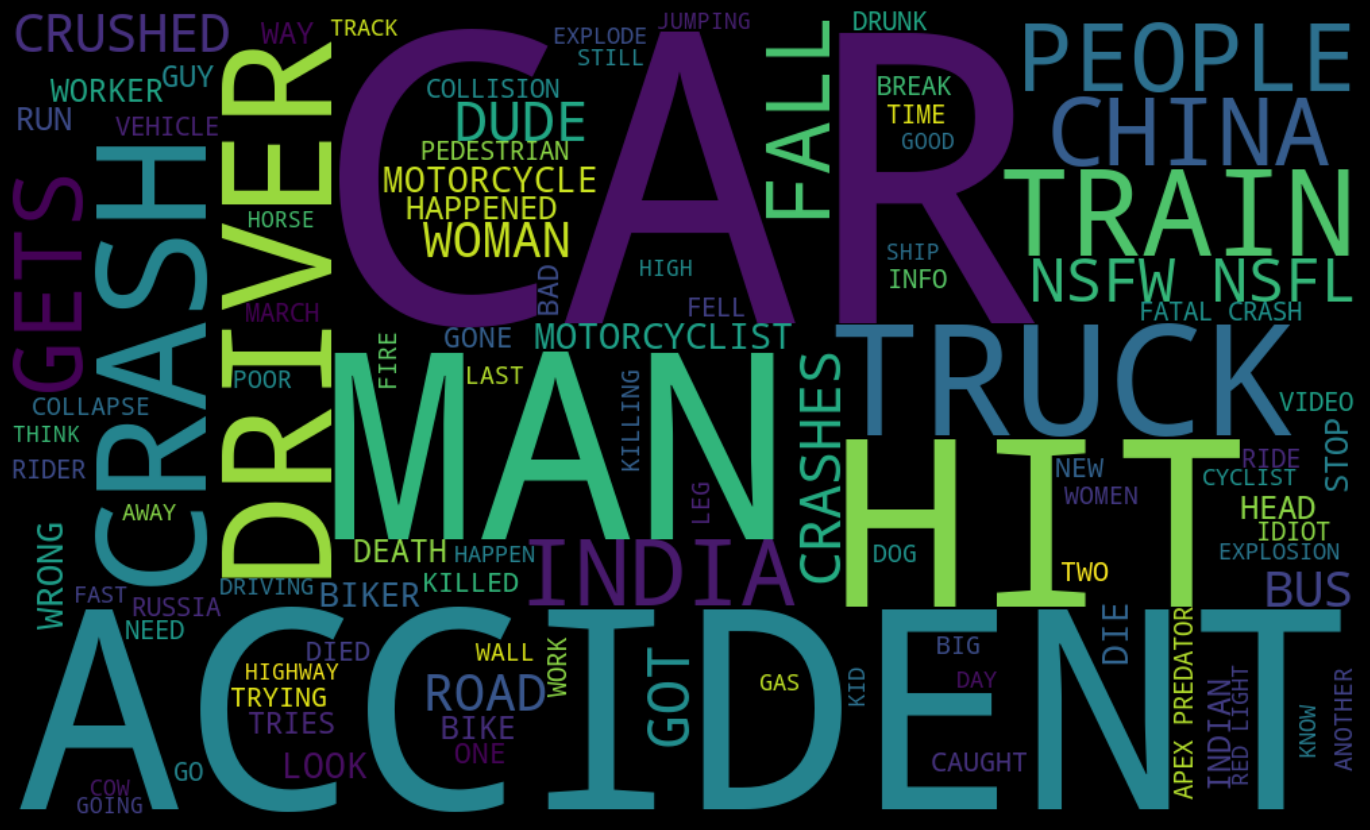

In [52]:
text = ' '.join( [twts for twts in Accidents_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

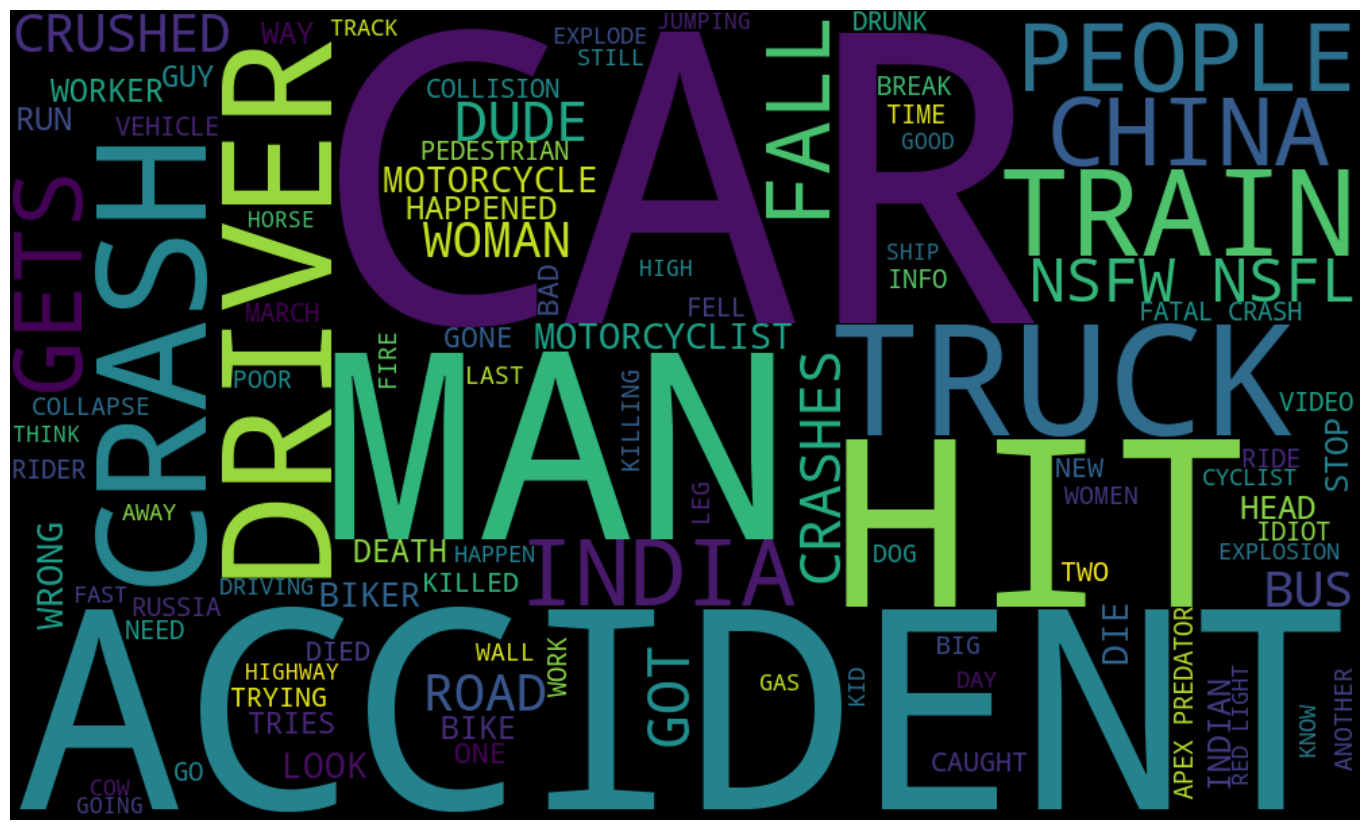

In [53]:
# Initialize a WordCloud object with specified parameters
wc = WordCloud(background_color='white', width = 1000, height=600, max_words=100, margin=2)

# Fit the word frequencies from freq_df DataFrame into the WordCloud object
wc.fit_words(freq_Accidents_df['freq'].to_dict() )

# Create a new figure with specified size and facecolor
plt.figure(figsize = (20, 10), facecolor = 'none')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

# Display the word cloud
plt.show()

# **RANDOM REGEX EXPRESSIONS:**

**EMAIL ADDRESS:**

In [55]:
import re

# Define the email address to validate
email = "hepsiba.battula@example.com"

# Use regular expression to match the email address pattern
if re.match(r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$', email):
    # If the email address matches the pattern, print "Valid email address"
    print("Valid email address")
else:
    # If the email address does not match the pattern, print "Invalid email address"
    print("Invalid email address")

Valid email address


**URL:**

In [56]:
import re

# Define the URL to validate
url = "https://www.shutransit.com"

# Use regular expression to match the URL pattern
if re.match(r'^(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?$', url):
    # If the URL matches the pattern, print "Valid URL"
    print("Valid URL")
else:
    # If the URL does not match the pattern, print "Invalid URL"
    print("Invalid URL")

Valid URL


**FILE PATH:**

In [58]:
import re

# Define the file path to validate
file_path = "/hepsiba/docs/file/data.csv"

# Use regular expression to match the file path pattern
if re.match(r'^\/(?:[^\/\n]+\/)*[^\/\n]+\.[a-zA-Z0-9]+$', file_path):
    # If the file path matches the pattern, print "Valid file path"
    print("Valid file path")
else:
    # If the file path does not match the pattern, print "Invalid file path"
    print("Invalid file path")

Valid file path


**PHONE NUMBER:**

In [59]:
import re

# Define the phone number to validate
phone_number = "+1 (555) 123-4567"

# Use regular expression to match the phone number pattern
if re.match(r'^\+(?:[0-9] ?){6,14}[0-9]$', phone_number):
    # If the phone number matches the pattern, print "Valid phone number"
    print("Valid phone number")
else:
    # If the phone number does not match the pattern, print "Invalid phone number"
    print("Invalid phone number")

Invalid phone number


**VARIABLE NAME:**

In [60]:
import re

# Define the variable name to validate
name= "hepsiba"

# Use regular expression to match the variable name pattern
if re.match(r'^[a-zA-Z_][a-zA-Z0-9_]*$', name):
    # If the variable name matches the pattern, print "Valid variable name"
    print("Valid variable name")
else:
    # If the variable name does not match the pattern, print "Invalid variable name"
    print("Invalid variable name")

Valid variable name
